In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df=lambda x:pd.DataFrame(x)

In [7]:
#键值对式序列化库
PICKLE_PATH='../softfits.pick'
import shelve
def set_pickle(k='temp',v=''):
    with shelve.open(PICKLE_PATH) as file:
        file[k]=v

def get_pickle(k):
    if k is None:
        return False
    with shelve.open(PICKLE_PATH) as file:
        try:
            v=file[k]
        except KeyError:
            return None
        else:
            return v

In [3]:
#img=np.load('./raweuv.npy')

In [136]:
img=get_pickle('img4')

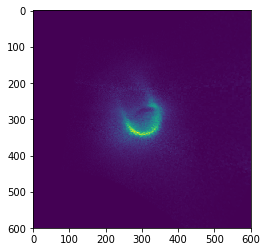

In [137]:
plt.imshow(img)

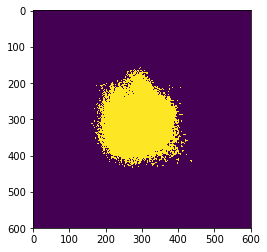

In [138]:
def 滤波(img):
    lim=40.0
    return np.where(img>lim,img.max(),img.min())
plt.imshow(滤波(img))

In [139]:
toPair=lambda img:(((x,y),img[x,y]) for x,y in zip(*np.where(img)))

In [140]:
to3DPair=lambda img:((x,y,img[x,y]) for x,y in zip(*np.where(img)))

In [141]:
img=滤波(img)

In [142]:
imgShape=img.shape
res=np.zeros((100,100))
winSize=6
for i,ix in enumerate(range(0,imgShape[0],winSize)):
    for j,jy in enumerate(range(0,imgShape[1],winSize)):
        res[i,j]=img[ix:ix+winSize,jy:jy+winSize].mean()

1. 地球坐标，半径
2. 原图及亮度
3. 过滤噪声后，等离子层的边缘
4. 指数衰减率
5. 极轴面等离子层轮廓(没有则假设 L x 4 )

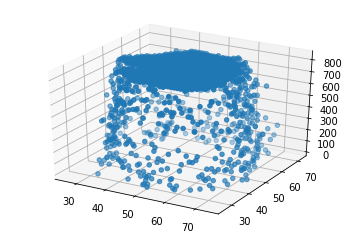

In [143]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X,Y,Z=list(zip(*to3DPair(res)))
#ax.scatter(xs, ys, zs, c=c, marker=m)
cset = ax.scatter(X,Y,Z)
#ax.clabel(cset, fontsize=9, inline=1)

plt.show()

In [144]:
import cv2
plt.imsave('./4test.png',res)
ccc=cv2.imread('./4test.png')
gray = cv2.cvtColor(ccc,cv2.COLOR_BGR2GRAY)

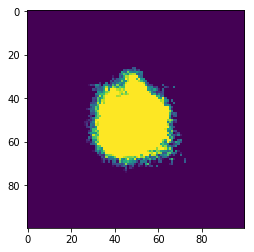

In [145]:
plt.imshow(gray)

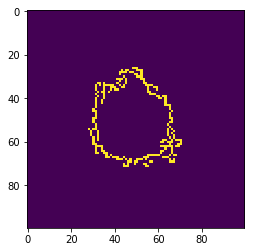

In [146]:
#mycanny=cv2.Canny(gray,250,750,8)#图1
mycanny=cv2.Canny(gray,250,450,8)#图2
plt.imshow(mycanny)